In [2]:
# import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score

In [3]:
df = pd.read_csv('E:/projects/data/PK COVID-19-3jun.csv')
df.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            2798 non-null   object
 1   Cases           2798 non-null   int64 
 2   Deaths          2798 non-null   int64 
 3   Recovered       2798 non-null   int64 
 4   Travel_history  2762 non-null   object
 5   Province        2798 non-null   object
 6   City            2798 non-null   object
dtypes: int64(3), object(4)
memory usage: 153.1+ KB


In [5]:
df.describe()

,Cases,Deaths,Recovered
count,2798.000000,2798.000000,2798.000000
mean,30.016440,0.617584,8.847034
std,128.861666,2.716284,61.362566
min,0.000000,0.000000,-2.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,9.000000,0.000000,1.000000
max,1639.000000,43.000000,1431.000000


In [6]:
df.columns

Index(['Date', 'Cases', 'Deaths', 'Recovered', 'Travel_history', 'Province',
       'City'],
      dtype='object')

In [7]:
df['Date'] =pd.to_datetime(df['Date'])
df['Travel_history'] = df['Travel_history'].fillna(df['Travel_history'].mode()[0])

In [8]:
df.head(2)

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2020-02-26,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2020-02-26,2,0,0,Iran/Taftan,Sindh,Karachi


In [9]:
df.isnull().sum()

Date              0
Cases             0
Deaths            0
Recovered         0
Travel_history    0
Province          0
City              0
dtype: int64

In [10]:
df1 = df[(df['Cases']>1) & (df['Cases']<1000)]
df1 = df[(df['Recovered']>1) & (df['Recovered']<1500)]

<Axes: xlabel='Cases', ylabel='Recovered'>

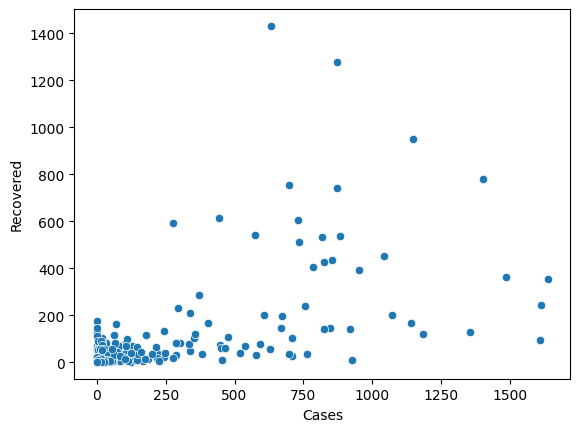

In [11]:
sns.scatterplot(df1, x='Cases', y='Recovered')

In [12]:
df['Recovered'].unique()

array([   0,    1,    3,    2,    6,   10,    4,   23,   17,    5,    9,
         12,   13,    7,   31,   11,  130,   28,   16,   27,   20,   48,
         18,   69,   14,   25,  175,   30,   19,  104,   59,  112,    8,
         15,   29,   39,   32,  115,   56,   24,  208,   40,   73,   38,
         42,   64,   60,  109,   83,   68,  129,   80,   70,   79,  606,
        105,  238,   41,   84,  533,   34,   37,  198,  405,   43,  511,
         36,  200,   26,  741,   21,  435,  146,  425,   66,   91,   51,
         -2,   22,  145,  614,  542,  755, 1278,   81,   86,   57,   89,
       1431,   -1,  454,  538,  780,  230,  948,   44,  119,  364,   54,
         88,   98,  118,  163,  133,   65,   46,   71,   58,  168,  288,
         35,  102,  594,  144,   33,   61,  141,  169,  394,  120,   95,
        353,  243], dtype=int64)

<Axes: xlabel='Cases', ylabel='Count'>

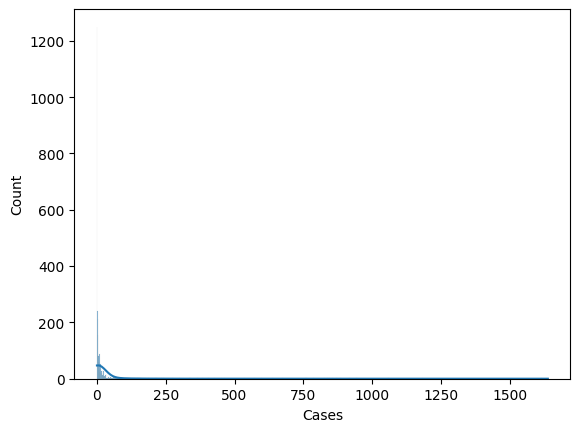

In [13]:
sns.histplot(df['Cases'], kde=1)

<Axes: ylabel='Recovered'>

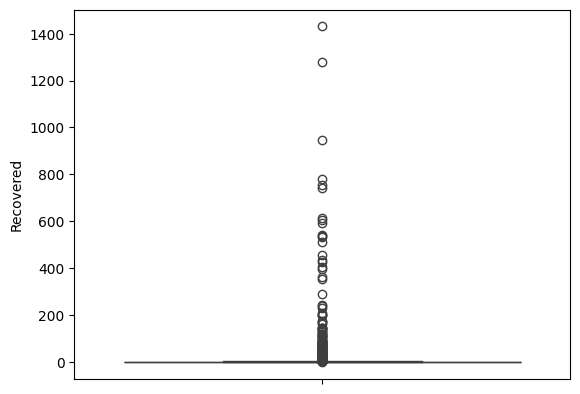

In [14]:
sns.boxplot(df, y='Recovered')

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
df['Travel_history'] = le.fit_transform(df['Travel_history'])
df['Province'] = le.fit_transform(df['Province'])
df['City'] = le.fit_transform(df['City'])
df['Date'] = le.fit_transform(df['Date'])

In [17]:
df.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,0,1,0,0,1,4,40
1,0,2,0,0,5,7,46
2,1,1,0,0,1,4,40
3,1,1,0,0,5,7,46
4,2,1,0,0,5,3,29


In [25]:
df.columns

Index(['Date', 'Cases', 'Deaths', 'Recovered', 'Travel_history', 'Province',
       'City'],
      dtype='object')

In [19]:
X = df.drop(df[['Recovered']], axis=1)
y = df['Recovered']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

c:\Users\Salman\anaconda3\envs\python_ML\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
model.predict([[1,	5,	0,	1,	1,	44]])

c:\Users\Salman\anaconda3\envs\python_ML\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([40], dtype=int64)